# Image Comrpession using K-means Clustering 

In this exercise, you will implement the K-means algorithm and use it for image compression. 

* Building the K-means Algorithm. 
* Using the K-means algorithm for image compression by reducing the number of colors that occur in an image to only those that are most common in that image.




# Outline
- [ 1 - Implementing K-means](#1)
  - [ 1.1 Finding closest centroids](#1.1)
    - [ closest centroids](#ex01)
  - [ 1.2 Computing centroid means](#1.2)
    - [ centroid means](#ex02)
- [ 2 - K-means on a sample dataset ](#2)
- [ 3 - Random initialization](#3)
- [ 4 - Image compression with K-means](#4)
  - [ 4.1 Dataset](#4.1)
  - [ 4.2 K-Means on image pixels](#4.2)
  - [ 4.3 Compressing the image](#4.3)


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from utils import *

%matplotlib inline

<a name="1"></a>
## 1 - Implementing K-means


* K-means is an iterative procedure that
     * Starts by guessing the initial centroids, and then 
     * Refines this guess by 
         * Repeatedly assigning examples to their closest centroids, and then 
         * Recomputing the centroids based on the assignments.
         

* In pseudocode, the K-means algorithm is as follows:

    ``` python
    # Initialize centroids
    # K is the number of clusters
    centroids = kMeans_init_centroids(X, K)
    
    for iter in range(iterations):
        # Cluster assignment step: 
        # Assign each data point to the closest centroid. 
        # idx[i] corresponds to the index of the centroid 
        # assigned to example i
        idx = find_closest_centroids(X, centroids)

        # Move centroid step: 
        # Compute means based on centroid assignments
        centroids = compute_centroids(X, idx, K)
    ```


* The inner-loop of the algorithm repeatedly carries out two steps: 
    1. Assigning each training example $x^{(i)}$ to its closest centroid, and
    2. Recomputing the mean of each centroid using the points assigned to it. 
    
    
* The $K$-means algorithm will always converge to some final set of means for the centroids. 

* However, the converged solution may not always be ideal and depends on the initial setting of the centroids.
    * Therefore, in practice the K-means algorithm is usually run a few times with different random initializations. 
    * One way to choose between these different solutions from different random initializations is to choose the one with the lowest cost function value (distortion).

 


<a name="1.1"></a>
### 1.1 Finding closest centroids


* Specifically, for every example $x^{(i)}$ we set
$$c^{(i)} := j \quad \mathrm{that \; minimizes} \quad ||x^{(i)} - \mu_j||^2,$$
where 
 * $c^{(i)}$ is the index of the centroid that is closest to $x^{(i)}$ (corresponds to `idx[i]` in the starter code), and 
 * $\mu_j$ is the position (value) of the $j$’th centroid. (stored in `centroids` in the starter code)
 * $||x^{(i)} - \mu_j||$ is the L2-norm
 


In [21]:


def find_closest_centroids(X, centroids):


    K = centroids.shape[0]

    idx = np.zeros(X.shape[0], dtype=int)


    for i in range(X.shape[0]):
        distances = []  # List to store the distance to each centroid
        for j in range(K):
            # Calculate the squared Euclidean distance between X[i] and centroid[j]
            distance = np.linalg.norm(X[i] - centroids[j])**2
            distances.append(distance)

        # Assign the index of the centroid with the minimum distance
        idx[i] = np.argmin(distances)

    return idx


In [25]:
# Load an example dataset that we will be using
X = load_data()

The code below prints the first five elements in the variable `X` and the dimensions of the variable

In [26]:
print("First five elements of X are:\n", X[:5]) 
print('The shape of X is:', X.shape)

First five elements of X are:
 [[1.84207953 4.6075716 ]
 [5.65858312 4.79996405]
 [6.35257892 3.2908545 ]
 [2.90401653 4.61220411]
 [3.23197916 4.93989405]]
The shape of X is: (300, 2)


In [27]:
# Select an initial set of centroids (3 Centroids)
initial_centroids = np.array([[3,3], [6,2], [8,5]])

# Find closest centroids using initial_centroids
idx = find_closest_centroids(X, initial_centroids)

# Print closest centroids for the first three elements
print("First three elements in idx are:", idx[:3])



First three elements in idx are: [0 2 1]
All tests passed!


**Output**:
<table>
  <tr>
    <td> <b>First three elements in idx are<b></td>
    <td> [0 2 1] </td> 
  </tr>
</table>

<a name="1.2"></a>
### 1.2 Computing centroid means


* Specifically, for every centroid $\mu_k$ we set
$$\mu_k = \frac{1}{|C_k|} \sum_{i \in C_k} x^{(i)}$$ 

where 
    * $C_k$ is the set of examples that are assigned to centroid $k$
    * $|C_k|$ is the number of examples in the set $C_k$


* Concretely, if two examples say $x^{(3)}$ and $x^{(5)}$ are assigned to centroid $k=2$,
then you should update $$\mu_2 = \frac{1}{2}(x^{(3)}+x^{(5)})$$.



In [32]:


def compute_centroids(X, idx, K):

    m, n = X.shape
    
    # You need to return the following variables correctly
    centroids = np.zeros((K, n))
    
    counts = np.zeros(K)
    
    for i in range(m):
        centroids[idx[i]] += X[i]  # Add the point X[i] to the corresponding centroid
        counts[idx[i]] += 1        # Increment the count for the assigned centroid
    
    for i in range(K):
        if counts[i] > 0:
            centroids[i] /= counts[i]  # Divide by the count to get the mean

    return centroids


# OR:

```
    ### START CODE HERE ###
    for k in range(K):   
          points = X[idx == k]  
          centroids[k] = np.mean(points, axis = 0)

    ### END CODE HERE ## 
    
    return centroids
    
```

Now check your implementation by running the cell below

In [34]:
K = 3
centroids = compute_centroids(X, idx, K)

print("The centroids are:", centroids)



The centroids are: [[2.42830111 3.15792418]
 [5.81350331 2.63365645]
 [7.11938687 3.6166844 ]]
All tests passed!


**Output**:

2.42830111 3.15792418

5.81350331 2.63365645

7.11938687 3.6166844 

<a name="2"></a>
## 2 - K-means on a sample dataset 



<img src="images/figure 1.png" width="500" height="500">



In [35]:

def run_kMeans(X, initial_centroids, max_iters=10, plot_progress=False):

    m, n = X.shape
    K = initial_centroids.shape[0]
    centroids = initial_centroids
    previous_centroids = centroids    
    idx = np.zeros(m)
    plt.figure(figsize=(8, 6))

    for i in range(max_iters):
        
        print("K-Means iteration %d/%d" % (i, max_iters-1))
        
        idx = find_closest_centroids(X, centroids)
        
        # Optionally plot progress
        if plot_progress:
            plot_progress_kMeans(X, centroids, previous_centroids, idx, K, i)
            previous_centroids = centroids
            
        # Given the memberships, compute new centroids
        centroids = compute_centroids(X, idx, K)
    plt.show() 
    return centroids, idx

K-Means iteration 0/9
K-Means iteration 1/9
K-Means iteration 2/9
K-Means iteration 3/9
K-Means iteration 4/9
K-Means iteration 5/9
K-Means iteration 6/9
K-Means iteration 7/9
K-Means iteration 8/9
K-Means iteration 9/9


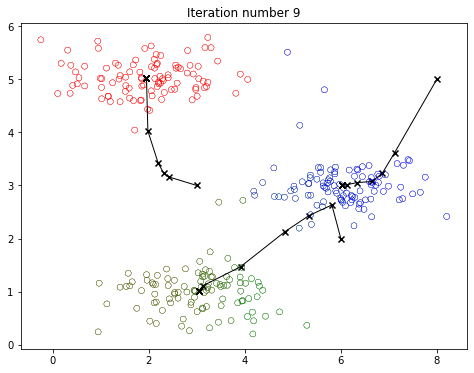

In [36]:
X = load_data()

# Set initial centroids
initial_centroids = np.array([[3,3],[6,2],[8,5]])

# Number of iterations
max_iters = 10

# Run K-Means
centroids, idx = run_kMeans(X, initial_centroids, max_iters, plot_progress=True)

<a name="3"></a>
## 3 - Random initialization

The initial assignments of centroids for the example dataset was designed so that the same figure as in Figure 1. A better strategy for initializing the centroids is to select random examples from the
training set.

How the function `kMeans_init_centroids` is implemented?
* The code first randomly shuffles the indices of the examples (using `np.random.permutation()`). 
* Then, it selects the first $K$ examples based on the random permutation of the indices. 
* This allows the examples to be selected at random without the risk of selecting the same example twice.



In [37]:

def kMeans_init_centroids(X, K):

    
    # Randomly reorder the indices of examples
    randidx = np.random.permutation(X.shape[0])
    
    # Take the first K examples as centroids
    centroids = X[randidx[:K]]
    
    return centroids

We can run K-Means again but this time with random initial centroids. Several times to observe how different clusters are created based on the initial points chosen:

K-Means iteration 0/9
K-Means iteration 1/9
K-Means iteration 2/9
K-Means iteration 3/9
K-Means iteration 4/9
K-Means iteration 5/9
K-Means iteration 6/9
K-Means iteration 7/9
K-Means iteration 8/9
K-Means iteration 9/9


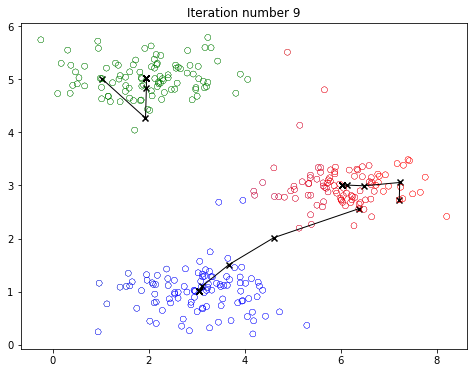

In [49]:

K = 3
max_iters = 10

initial_centroids = kMeans_init_centroids(X, K)

centroids, idx = run_kMeans(X, initial_centroids, max_iters, plot_progress=True)

<a name="4"></a>
## 4 - Image compression with K-means


<img src="images/figure 2.png" width="500" height="500">


<a name="4.1"></a>
### 4.1 Dataset

**Loading the image**



In [50]:
# Load an image of a bird
original_img = plt.imread('bird_small.png')

**Visualizing the image**

You can visualize the image that was just loaded using the code below.

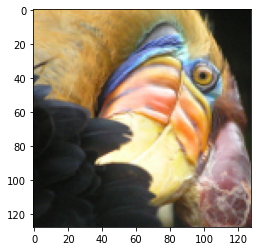

In [51]:
# Visualizing the image
plt.imshow(original_img)

**Checking the dimension of the variable**



In [41]:
print("Shape of original_img is:", original_img.shape)

Shape of original_img is: (128, 128, 3)




#### Processing data


* The code below reshapes the matrix `original_img` to create an $m \times 3$ matrix of pixel colors (where
$m=16384 = 128\times128$)



In [42]:


X_img = np.reshape(original_img, (original_img.shape[0] * original_img.shape[1], 3))

<a name="4.2"></a>
### 4.2 K-Means on image pixels



In [43]:

K = 16
max_iters = 10

initial_centroids = kMeans_init_centroids(X_img, K)

centroids, idx = run_kMeans(X_img, initial_centroids, max_iters)

K-Means iteration 0/9
K-Means iteration 1/9
K-Means iteration 2/9
K-Means iteration 3/9
K-Means iteration 4/9
K-Means iteration 5/9
K-Means iteration 6/9
K-Means iteration 7/9
K-Means iteration 8/9
K-Means iteration 9/9


<Figure size 576x432 with 0 Axes>

In [44]:
print("Shape of idx:", idx.shape)
print("Closest centroid for the first five elements:", idx[:5])

Shape of idx: (16384,)
Closest centroid for the first five elements: [15 15 15 15 15]


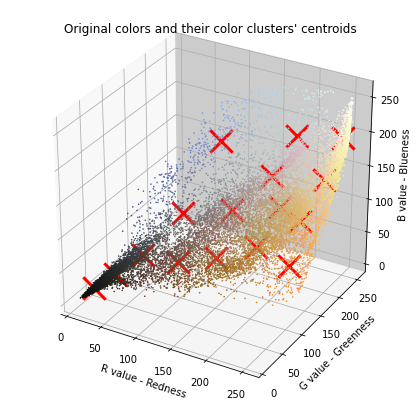

In [45]:
plot_kMeans_RGB(X_img, centroids, idx, K)

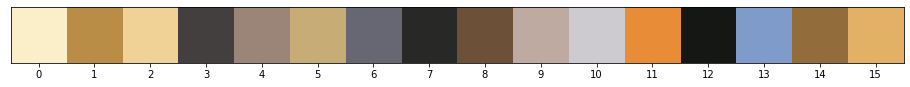

In [46]:
# Visualize the 16 colors selected
show_centroid_colors(centroids)

<a name="4.3"></a>
### 4.3 Compress the image


In [47]:
# Find the closest centroid of each pixel
idx = find_closest_centroids(X_img, centroids)

# Replace each pixel with the color of the closest centroid
X_recovered = centroids[idx, :] 

# Reshape image into proper dimensions
X_recovered = np.reshape(X_recovered, original_img.shape) 

Now, we can view the effects of the compression by reconstructing
the image based only on the centroid assignments. 
* Specifically, we replaced each pixel with the value of the centroid assigned to
it. 
* Figure 3 shows a sample reconstruction. Even though the resulting image retains most of the characteristics of the original, we will also see some compression artifacts because of the fewer colors used.

<img src="images/figure 3.png" width="700" height="700">



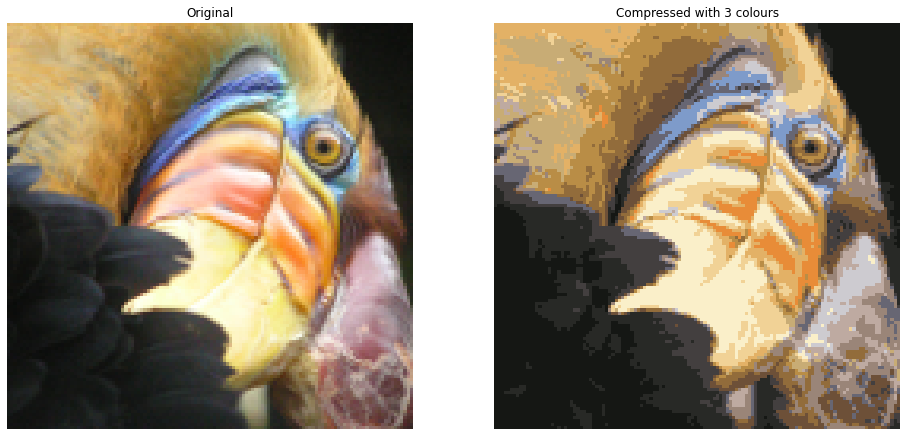

In [52]:
# Display original image
fig, ax = plt.subplots(1,2, figsize=(16,16))
plt.axis('off')

ax[0].imshow(original_img)
ax[0].set_title('Original')
ax[0].set_axis_off()


# Display compressed image
ax[1].imshow(X_recovered)
ax[1].set_title('Compressed with %d colours'%K)
ax[1].set_axis_off()